In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns
import os
from scipy import stats
cwd = os.getcwd() 

In [2]:
import json
import requests
from urllib.request import urlopen
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
DF= pd.read_csv(cwd[:-4]+'/Data/data_farmclass_state.csv')

In [4]:
DF#.columns[100:150]

,year,state_name,state_fips_code,domaincat_desc,ACRES,NUMBER OF OPERATIONS,farmcat,lower_bound,upper_bound,CONSERVATION EASEMENT - ACRES,...,state_code_54,state_code_55,state_code_56,cropland_insured,land_sqmi,cropland_share,climate_edd_z_full_year,climate_prec_z_full_year,climate_ffp_full_year,climate_ffp_z_full_year
0,2012,ALABAMA,1,AREA OPERATED: (1.0 TO 9.9 ACRES),2607.0,861,1 TO 9,1,9.000000,64.0,...,0,0,0,0.023782,50645,0.066579,0.821545,-0.371258,233.566055,0.112911
1,2012,ALABAMA,1,AREA OPERATED: (10.0 TO 49.9 ACRES),64793.0,4879,10 TO 49,10,49.000000,1676.0,...,0,0,0,0.047274,50645,0.066579,0.821545,-0.371258,233.566055,0.112911
2,2012,ALABAMA,1,AREA OPERATED: (50.0 TO 69.9 ACRES),45288.0,1900,50 TO 69,50,69.000000,832.0,...,0,0,0,0.097355,50645,0.066579,0.821545,-0.371258,233.566055,0.112911
3,2012,ALABAMA,1,AREA OPERATED: (70.0 TO 99.9 ACRES),63221.0,2313,70 TO 99,70,99.000000,2847.0,...,0,0,0,0.092343,50645,0.066579,0.821545,-0.371258,233.566055,0.112911
4,2012,ALABAMA,1,AREA OPERATED: (100 TO 139 ACRES),83054.0,2333,100 TO 139,100,139.000000,2212.0,...,0,0,0,0.124124,50645,0.066579,0.821545,-0.371258,233.566055,0.112911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2017,WYOMING,56,AREA OPERATED: (220 TO 259 ACRES),17315.0,150,220 TO 259,220,259.000000,795.0,...,0,0,1,0.210049,97093,0.024861,0.020195,-0.078232,126.995260,0.632982
1142,2017,WYOMING,56,AREA OPERATED: (260 TO 499 ACRES),90829.0,535,260 TO 499,260,499.000000,5216.0,...,0,0,1,0.339418,97093,0.024861,0.020195,-0.078232,126.995260,0.632982
1143,2017,WYOMING,56,AREA OPERATED: (500 TO 999 ACRES),156182.0,576,500 TO 999,500,999.000000,12309.0,...,0,0,1,0.464855,97093,0.024861,0.020195,-0.078232,126.995260,0.632982
1144,2017,WYOMING,56,"AREA OPERATED: (1,000 TO 1,999 ACRES)",239152.0,507,1000 TO 1999,1000,1999.000000,21320.0,...,0,0,1,0.486402,97093,0.024861,0.020195,-0.078232,126.995260,0.632982


In [5]:
DF.loc[DF.insured_farms > 1, 'insured_farms'] = 1
DF['farm class']= DF['farm_class']

### Distribution of intensity of practices (% area) by groups

<AxesSubplot:xlabel='farmcat', ylabel='tile_num'>

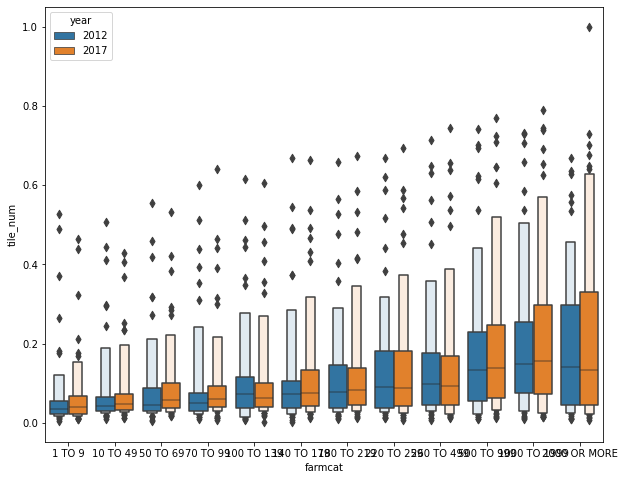

In [5]:
plt.figure(figsize=(10,8))
rank=['1 TO 9', '10 TO 49', '50 TO 69','70 TO 99', '100 TO 139', '140 TO 179', '180 TO 219', '220 TO 259',
       '260 TO 499', '500 TO 999','1000 TO 1999','2000 OR MORE']
sns.boxenplot(x="farmcat", y="tile_num",
            hue="year", order=rank, data=DF) #, split=True,inner="quart", linewidth=1,

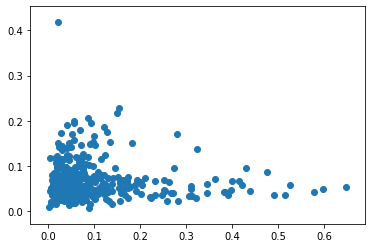

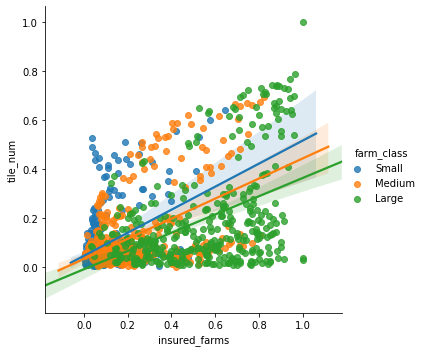

In [7]:
plt.scatter(DF["insured_farms"][DF['farm_class']=='Small'], DF["cover_crops"][DF['farm_class']=='Small'])
#plt.scatter(DF["insured_farms"][DF['farm_class']=='Medium'], DF["tile_num"][DF['farm_class']=='Medium'])
#plt.scatter(DF["insured_farms"][DF['farm_class']=='Large'], DF["tile_num"][DF['farm_class']=='Large'])
sns.lmplot(data= DF, x='insured_farms', y='tile_num', hue='farm_class')

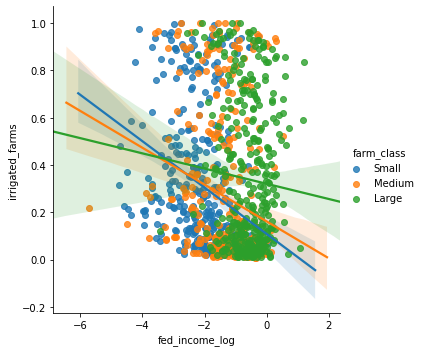

In [5]:
DF['fed_income_log']= np.log(DF['fed_income'])

sns.lmplot(data= DF, x='fed_income_log', y='irrigated_farms', hue='farm_class')

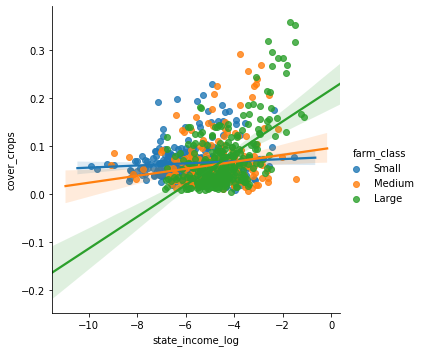

In [6]:
DF['state_income_log']=np.log(DF['state_income'])
sns.lmplot(data= DF, x='state_income_log', y='cover_crops', hue='farm_class')

### Distributions

In [10]:
def plot_hist_farmclass(DF, var, title,ax):
    plt.rcParams["font.family"] = 'serif'
    k=0
    for gr, abb in zip(DF['farm_class'].unique(), ['s', 'm', 'L']):
        eta= DF[var][DF['farm_class']==gr].quantile(0.50)
        q1 = DF[var][DF['farm_class']==gr].quantile(0.25)
        q3 = DF[var][DF['farm_class']==gr].quantile(0.75)
        iqr = q3- q1
        
        k+= -0.1
        if var== 'machinery_asset':
            ax.hist((DF[var][DF['farm_class']==gr]), 30, label= gr, alpha=0.5, histtype= 'barstacked', density=True)
        else:
            ax.hist((DF[var][DF['farm_class']==gr])*100, 30, label= gr, alpha=0.5, histtype= 'barstacked', density=True)
        if var== 'mean_netincome':
            
            ax.text(0.9, 0.8+k, '$\eta_{}={:,.0f},\ iqr_{}={:,.0f}$'.format(abb,eta, abb,iqr),
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes)
            

        else:
            ax.text(0.9, 0.8+k, '$\eta_{}={:,.2f},\ iqr_{}={:,.2f}$'.format(abb,eta, abb,iqr),
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes)
        ax.set_title(title)

### Correlation matrix and heatmap

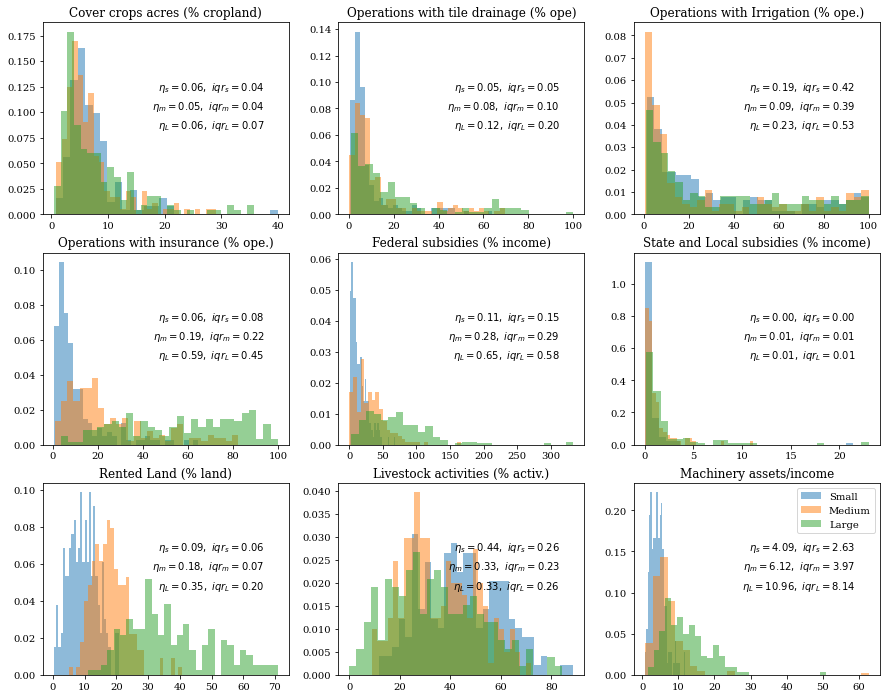

In [11]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5),
     (ax6, ax7, ax8)) = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

varlist= ['cover crops', 'tile_num','irrigated_farms',
          'insured_farms','fed_income', 'state_income',
          'rented_land','livestockfarm_share','machinery_asset']
varnames= ['Cover crops acres (% cropland)', 'Operations with tile drainage (% ope)','Operations with Irrigation (% ope.)',
           'Operations with insurance (% ope.)','Federal subsidies (% income)','State and Local subsidies (% income)',
          'Rented Land (% land)', 'Livestock activities (% activ.)','Machinery assets/income']

for x, ax, y in zip(varlist, [ax0, ax1, ax2,ax3, ax4, ax5, ax6, ax7, ax8], varnames):
    plot_hist_farmclass(DF[DF['year']== 2017], x, y, ax)

ax.legend(prop={'family': 'serif'})
plt.savefig(cwd[:-4]+'/Results/Graphics/distributions.png', dpi=1200, bbox_inches = 'tight')

In [8]:
DF.groupby(['farm_class', 'year'])[varlist + ['livestockfarm_share']].quantile([0.5, 0.25, 0.75])

cover crops  tile_num  irrigated_farms  fed_income  \
farm_class year                                                            
Large      2012 0.50     0.041670  0.127717         0.229339    0.542362   
                0.25     0.021464  0.054682         0.076927    0.380205   
                0.75     0.080712  0.235294         0.580673    0.754120   
           2017 0.50     0.056586  0.120968         0.230354    0.648803   
                0.25     0.032867  0.055061         0.070451    0.368265   
                0.75     0.103389  0.250698         0.600288    0.950451   
Medium     2012 0.50     0.042964  0.077220         0.092497    0.387021   
                0.25     0.029382  0.037321         0.038009    0.247631   
                0.75     0.063455  0.130435         0.364958    0.535293   
           2017 0.50     0.053649  0.075104         0.089452    0.276760   
                0.25     0.038101  0.042813         0.036432    0.140183   
                0.75     0.080659  0.138824         0.431109    0.428113   
Small      2012 0.50     0.052256  0.043228         0.204299    0.176892   
                0.25     0.037472  0.027862         0.067658    0.096636   
                0.75     0.068668  0.072967         0.495312    0.270619   
           2017 0.50     0.061600  0.050611         0.193634    0.112579   
                0.25     0.045223  0.033320         0.066237    0.054838   
                0.75     0.085992  0.087220         0.481990    0.208345   

                      state_income  insured_farms  mean_netincome  \
farm_class year                                                     
Large      2012 0.50      0.009333       0.562920       140939.50   
                0.25      0.004927       0.323565        55668.75   
                0.75      0.019736       0.749324       347685.00   
           2017 0.50      0.009903       0.589558       131955.00   
                0.25      0.006414       0.333333        61478.00   
                0.75      0.018370       0.788291       259313.00   
Medium     2012 0.50      0.009802       0.168990        17624.00   
                0.25      0.005583       0.092301         6823.75   
                0.75      0.024069       0.289584        33636.00   
           2017 0.50      0.005720       0.189850        26584.00   
                0.25      0.003414       0.106000        11244.25   
                0.75      0.011800       0.329288        43282.25   
Small      2012 0.50      0.005858       0.051813         2850.50   
                0.25      0.002582       0.029714        -1655.50   
                0.75      0.014237       0.096898        10073.25   
           2017 0.50      0.002366       0.064328         6268.50   
                0.25      0.001080       0.034038         -263.75   
                0.75      0.005912       0.118846        17068.75   

                      rented_land  machinery_asset  livestockfarm_share  
farm_class year                                                          
Large      2012 0.50     0.358036         8.638944             0.305833  
                0.25     0.269035         6.363101             0.185929  
                0.75     0.481019        11.891964             0.440078  
           2017 0.50     0.347169        10.963246             0.329371  
                0.25     0.273684         7.194350             0.208165  
                0.75     0.471249        15.336193             0.469568  
Medium     2012 0.50     0.191245         6.667088             0.325103  
                0.25     0.156610         5.125284             0.241500  
                0.75     0.233783         9.145882             0.440217  
           2017 0.50     0.177836         6.119303             0.325151  
                0.25     0.139017         4.340059             0.247555  
                0.75     0.213968         8.305105             0.478033  
Small      2012 0.50     0.097436         4.537696             0.440514  
          

In [9]:
def heatmap_vars(df,varlist, varnames):
    corri = df[varlist].corr()

    # plot half heatmap 

    mask = np.zeros_like(corri)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(11, 9))
        sns.heatmap(corri, mask=mask, square=True,xticklabels=varnames,
            yticklabels=varnames,cmap="YlGnBu", annot=True, fmt=".2f", ax=ax, linewidth=.5)
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top)

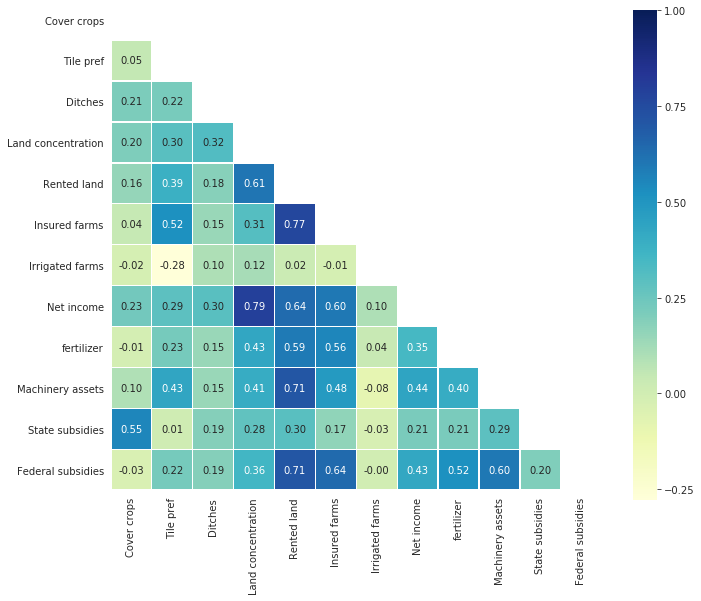

In [10]:
varlist=['cover crops','tile_num','ditches_num','land_concent','rented_land','insured_farms','irrigated_farms',
         'mean_netincome','fert_share','machinery_asset','state_income','fed_income']
varnames=['Cover crops','Tile pref','Ditches','Land concentration','Rented land', 'Insured farms', 'Irrigated farms',
         'Net income','fertilizer','Machinery assets','State subsidies','Federal subsidies']
heatmap_vars(DF[DF['year']==2017],varlist, varnames)


In [63]:
corri = DF[varlist].corr()
corri

,cover crops,tile_num,ditches_num,land_concent,rented_land,insured_farms,irrigated_cropland,mean_netincome,workers_mean,machinery_asset,share_agroexp,state_income,fed_income
cover crops,1.000000,0.023033,0.161067,0.177527,0.099975,0.033391,-0.114223,0.143325,0.197797,0.043976,-0.365153,0.447394,-0.079426
tile_num,0.023033,1.000000,0.225361,0.244915,0.404747,0.490809,-0.310888,0.297643,-0.080609,0.286933,0.081509,-0.045498,0.125180
ditches_num,0.161067,0.225361,1.000000,0.261583,0.253989,0.154424,0.037178,0.265873,0.114734,0.156478,-0.198752,0.082645,0.108741
land_concent,0.177527,0.244915,0.261583,1.000000,0.586340,0.327786,0.018594,0.765382,0.133911,0.323344,-0.110900,0.204727,0.279132
rented_land,0.099975,0.404747,0.253989,0.586340,1.000000,0.739129,-0.032939,0.658448,-0.033243,0.488391,0.002316,0.148511,0.536511
insured_farms,0.033391,0.490809,0.154424,0.327786,0.739129,1.000000,-0.053270,0.626246,-0.104888,0.350086,0.314908,0.050933,0.531097
irrigated_cropland,-0.114223,-0.310888,0.037178,0.018594,-0.032939,-0.053270,1.000000,0.066109,0.061387,-0.092379,-0.131253,-0.136798,-0.049109
mean_netincome,0.143325,0.297643,0.265873,0.765382,0.658448,0.626246,0.066109,1.000000,0.004627,0.357272,-0.017944,0.079737,0.302240
workers_mean,0.197797,-0.080609,0.114734,0.133911,-0.033243,-0.104888,0.061387,0.004627,1.000000,0.087520,-0.038163,0.046928,-0.140915
machinery_asset,0.043976,0.286933,0.156478,0.323344,0.488391,0.350086,-0.092379,0.357272,0.087520,1.000000,-0.091085,0.210771,0.622946


<Figure size 1440x432 with 0 Axes>

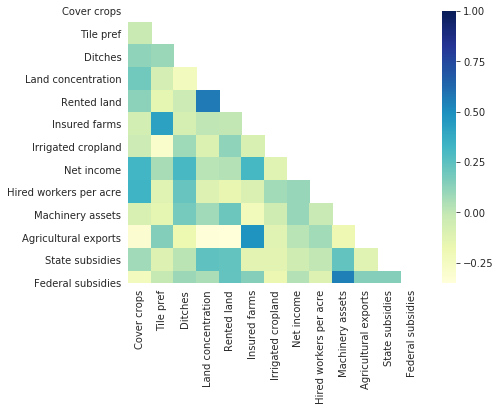

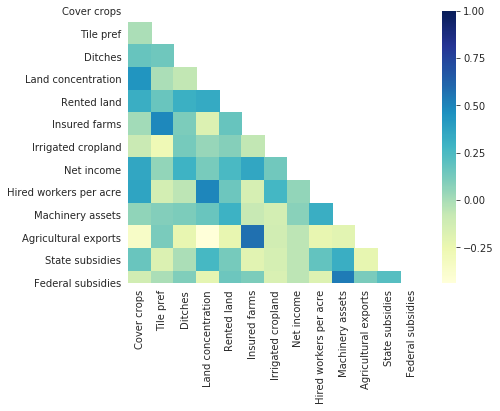

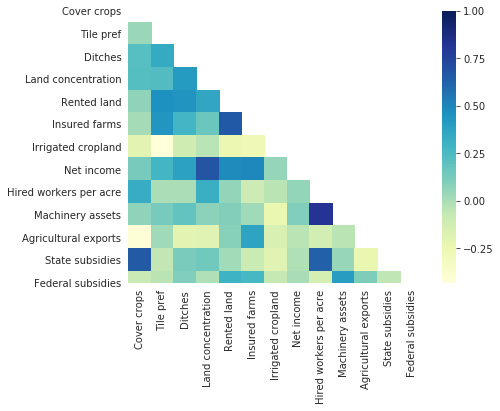

In [41]:
plt.figure(figsize=(20,6))
for fm in DF['farm class'].unique().tolist():

    heatmap_vars(DF[(DF['farm class']== fm)],varlist, varnames)

## Compute Gaps

In [6]:
# Get categories averages

### Land, farms and practices are aggregated (numerator and denominator) by category
## land and operations share by category
DF['tot_ope_cat']= DF.groupby(['year','State','farm_class'])['farms_tot'].transform('sum') ## total values
DF['tot_land_cat']= DF.groupby(['year','State','farm_class'])['acres_tot'].transform('sum')


DF['ope_share_cat']= DF.groupby(['year','State','farm_class'])['share_farms'].transform('sum') ## share values
DF['land_share_cat']= DF.groupby(['year','State','farm_class'])['share_acres'].transform('sum')

## Operations share within category

DF['ope_weight']= DF['farms_tot']/DF['tot_ope_cat']

## Large farms participation

## coverage practices by CATEGORY
DF['covercrops_cat']= (DF.groupby(['year','State','farm_class'])['(EXCL CRP) - ACRES'].transform('sum'))/DF['tot_land_cat']
DF['tile_cat']= (DF.groupby(['year','State','farm_class'])['DRAINED BY TILE - NUMBER OF OPERATIONS'].transform('sum'))/DF['tot_ope_cat']
DF['irrigation_cat']= (DF.groupby(['year','State','farm_class'])['IRRIGATED - NUMBER OF OPERATIONS'].transform('sum'))/DF['tot_ope_cat']

DF['covercrops_mean']= (DF.groupby(['year','State','farm_class'])['cover crops'].transform('mean'))
DF['tile_mean']= (DF.groupby(['year','State','farm_class'])['tile_num'].transform('mean'))
DF['irrigation_mean']= (DF.groupby(['year','State','farm_class'])['irrigated_farms'].transform('mean'))


In [7]:
## Other variables: we take a weighted average
listA= ['cover crops', 'tile_num','irrigated_farms','rented_land','machinery_asset',
        'state_income','fed_income','insured_farms']

# 'share farms' is the % per group: use it as weight
listC=[]
for var in listA:
    DF[var+'_w']= DF[var]*DF['ope_weight']
    DF[var+'_cat']= DF.groupby(['year','State','farm_class'])[var+'_w'].transform('sum')
    listC+= [var+'_']

In [8]:
# Dataframe with S, M, L categories summaries (weighted averages): DFcat
DFcat= DF.drop_duplicates(subset=['year','State','farm_class'], keep= 'first')

In [10]:
## Dataframe with Small and Large categories: DFg

DFg= DFcat[DFcat['farm_class']!= 'Medium'] #keep small and large categories
#DFg= DFcat[DFcat['farm_class']!= 'Large']
listC=[]
for var in listA+['land_share', 'ope_share']:
    DFg[var+'_gap'] = DFg.groupby(['year','state_fips_code'])[var+'_cat'].shift(-1)- DFg[var+'_cat']
    listC+= [var+'_gap']

<ipython-input-10-d6112708d169>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFg[var+'_gap'] = DFg.groupby(['year','state_fips_code'])[var+'_cat'].shift(-1)- DFg[var+'_cat']


In [11]:
DFg.drop_duplicates(subset=['year','State'], keep= 'first', inplace=True)

<ipython-input-11-28b9cc7c2da9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFg.drop_duplicates(subset=['year','State'], keep= 'first', inplace=True)


## Maps


In [17]:
def states_map(state_abb, color, dfvar, label_var, filename):
    fig = go.Figure(data=go.Choropleth(
        locations= state_abb, # Spatial coordinates
        z = dfvar, # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = color
        ,colorbar_title = label_var
        ,reversescale=False
    ))

    fig.update_layout(
        title_text = "",
        geo_scope='usa', # limite map scope to USA
        font=dict(family="Times New Roman", size= 22),
    )
    fig.show()
    pio.write_image(fig, cwd[:-4]+'/Results/Graphics/'+filename,scale=6, width=1000, height=700, engine="kaleido")



In [15]:
 ## Add state abbreviations
dfs= pd.read_csv(cwd[:-4]+'/Data/us_states.csv')
dfs= dfs[['Abbreviation', 'Fips']]
dfs.rename(columns= {'Fips': 'state_fips_code'}, inplace= True)
DF= DF.merge(dfs, on= ['state_fips_code'])

## Add state abbreviations
dfs= pd.read_csv(cwd[:-4]+'/Data/us_states.csv')
dfs= dfs[['Abbreviation', 'Fips']]
dfs.rename(columns= {'Fips': 'state_fips_code'}, inplace= True)
DFg= DFg.merge(dfs, on= ['state_fips_code'])
DFcat= DFcat.merge(dfs, on= ['state_fips_code'])

In [27]:
states_map(DF[(DF['year']== 2012)]['Abbreviation'], 'Greens', DF[(DF['year']== 2012)]['climate_ffp_full_year'].astype(float), '%', 'map_ffp_12.png')


### Maps with specific range

In [ ]:
def states_map(state_abb, color, dfvar, label_var, maxi, mini,filename): #to define min and max ranges
    fig = go.Figure(data=go.Choropleth(
        locations= state_abb, # Spatial coordinates
        z = dfvar, # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = color
        ,zmax= maxi,
        zmin= mini
        ,colorbar_title = label_var
        ,reversescale=True
    ))

    fig.update_layout(
        title_text = "",
        geo_scope='usa', # limite map scope to USA
        font=dict(family="Times New Roman", size= 22),
    )
    fig.show()
    pio.write_image(fig, cwd[:-4]+'/Results/Graphics/'+filename,scale=6, width=1000, height=700, engine="kaleido")


In [89]:
states_map(DFg[(DFg['year']== 2017)]['Abbreviation'], 'Inferno', DFg['cover crops_gap'][(DFg['year']== 2017)]*100, '%',35, -15, 'map_covercrops_gap.png')


In [90]:
states_map(DFg[(DFg['year']== 2017)]['Abbreviation'], 'Inferno', DFg['tile_num_gap'][(DFg['year']== 2017)]*100, '%',35, -15, 'map_tile_gap.png')


In [91]:
states_map(DFg[(DFg['year']== 2017)]['Abbreviation'], 'Inferno', DFg['irrigated_farms_gap'][(DFg['year']== 2017)]*100, '%',35, -15, 'map_irr_gap.png')
